In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("normalization.csv")


# Data cleaning and preprocessing (handle missing values, convert data types, etc.)

# Extract relevant features for clustering
features_for_clustering = ['Age', 'Purchase_Amount', 'Brand_Affinity_Score']

# Assuming 'data' is your DataFrame
X = data[features_for_clustering]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.dropna())  # drop rows with missing values after conversion


C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

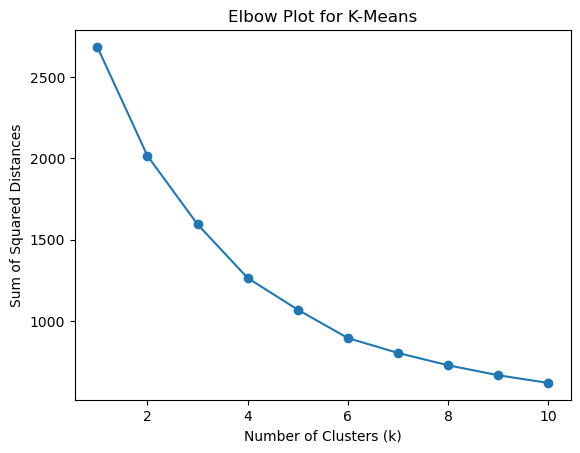

In [21]:

# A. K-Means Clustering:

# 1. Define the number of clusters (k):
# a. Elbow plot
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-Means')
plt.show()


C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

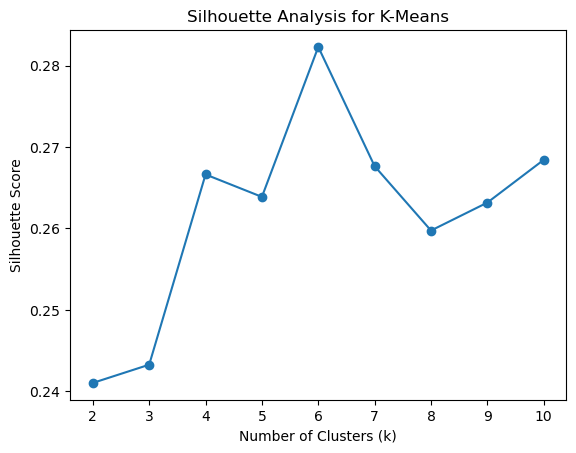

In [22]:

# b. Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.show()


In [23]:

# Choose the optimal k value based on the above analysis

# 2. Apply K-Means algorithm:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Analyze cluster characteristics:
cluster_characteristics = data.groupby('KMeans_Cluster').mean()

# 

C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Saim\AppData\Local\Temp\ipykernel_19024\1091420151.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics = data.groupby('KMeans_Cluster').mean()


C:\Users\Saim\AppData\Local\Temp\ipykernel_19024\4117679335.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dbscan_cluster_characteristics = data.groupby('DBSCAN_Cluster').mean()
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


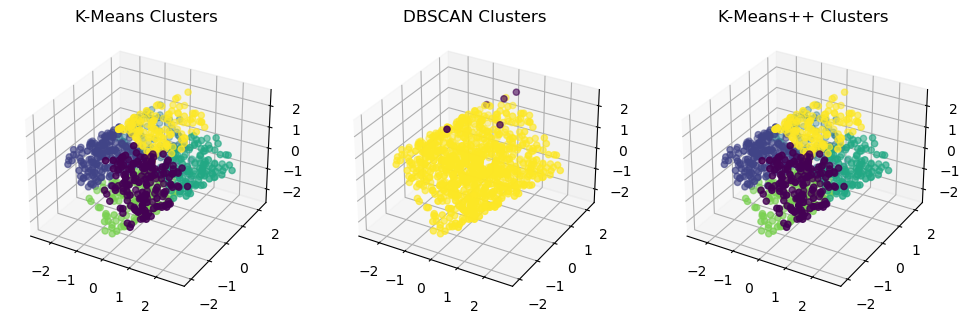

In [24]:
#B. DBSCAN Clustering:

# 1. Define eps and MinPts parameters:
# a. Experiment with different values
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
            silhouette = silhouette_score(X_scaled, labels)
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Choose the optimal parameters based on the above analysis

# 2. Apply DBSCAN algorithm:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# 3. Analyze cluster characteristics:
dbscan_cluster_characteristics = data.groupby('DBSCAN_Cluster').mean()

# C. K-Means++ Clustering:

# 1. Apply K-Means++ algorithm:
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['KMeansPP_Cluster'] = kmeans_pp.fit_predict(X_scaled)

# 2. Compare results to K-Means:
# Analyze and compare resulting clusters

# Visualize the clusters using PCA (for 3D data)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 6))

# Plot K-Means clusters
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['KMeans_Cluster'], cmap='viridis')
ax1.set_title('K-Means Clusters')

# Plot DBSCAN clusters
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['DBSCAN_Cluster'], cmap='viridis')
ax2.set_title('DBSCAN Clusters')

# Plot K-Means++ clusters
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['KMeansPP_Cluster'], cmap='viridis')
ax3.set_title('K-Means++ Clusters')

plt.show()
